In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/sophia/bachelor_thesis_ipython_notebooks')

from Paolo_class import GCphasespace
from GC_Orbit_class import GCorbit
%matplotlib inline

In [ ]:
if 0:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d,m1,m2,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH1.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)
else:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
    
r_3d0=r_3d[0]
m10=m1[0]
m20=m2[0]
x0=x[0]
y0=y[0]
z0=z[0]
vx0=vx[0]
vy0=vy[0]
vz0=vz[0]
vr0=vr[0]
vtheta0=vtheta[0]
vphi0=vphi[0]

r_3d=r_3d[1:]
m1=m1[1:]
m2=m2[1:]
x=x[1:]
y=y[1:]
z=z[1:]
vx=vx[1:]
vy=vy[1:]
vz=vz[1:]
vr=vr[1:]
vtheta=vtheta[1:]
vphi=vphi[1:]

In [3]:
#data for simulation without bh
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo,vr_wo,vtheta_wo,vphi_wo=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH2.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)
else:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [4]:
bh_orbit=GCorbit(inputfilename='densityfile_IMBH1.txt',bhmass_M_sun=m10+m20)
wobh_orbit=GCorbit(inputfilename='densityfile_noIMBH2.txt')

In [5]:
n=len(x)
r_guide_bh=np.zeros(n)

n_wo=len(x_wo)
r_guide_wobh=np.zeros(n_wo)


In [6]:
#orbit=bh_orbit.orbit_integration(x=x[35940],y=y[35940],z=z[35940],vx=vx[35940],vy=vy[35940],vz=vz[35940],dt=10000,t_end=1e11)

9.99996199747e+13 -130.497696885 -130.497744077 2000.33853352
0.425175 0.425174803279
-1.51460754361e-14
5.35929649877e-13


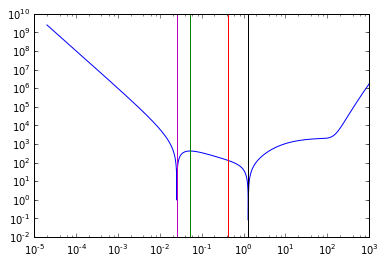

In [ ]:
k=7592
L=bh_orbit.angularmom(x[k],y[k],z[k],vx[k],vy[k],vz[k])[0]
E=bh_orbit.energy(x[k],y[k],z[k],vx[k],vy[k],vz[k])
r=10.**(np.linspace(np.log10(0.00002),3.,10000))
print(bh_orbit._periapocenter_aux(1e-7,E,L),bh_orbit._periapocenter_aux(r_3d[k],E,L),bh_orbit._periapocenter_aux(np.sqrt(x[k]**2+y[k]**2+z[k]**2),E,L),bh_orbit._periapocenter_aux(np.max(bh_orbit._r_bin)*1.03,E,L))
plt.loglog(r,np.abs(bh_orbit._periapocenter_aux(r=r,E=E,L=L)))

print(r_3d[k],np.sqrt(x[k]**2+y[k]**2+z[k]**2))
plt.axvline(r_3d[k],color='r')
plt.axvline(bh_orbit.periapocenter(r_3d[k],x[k],y[k],z[k],vx[k],vy[k],vz[k])[0], color='m')
plt.axvline(bh_orbit.periapocenter(r_3d[k],x[k],y[k],z[k],vx[k],vy[k],vz[k])[1], color='black')
print(bh_orbit._r_guide_aux(bh_orbit.periapocenter(r_3d[k],x[k],y[k],z[k],vx[k],vy[k],vz[k])[0],L=L))
print(bh_orbit._r_guide_aux(bh_orbit.periapocenter(r_3d[k],x[k],y[k],z[k],vx[k],vy[k],vz[k])[1],L=L))
plt.axvline(bh_orbit.r_guide(r_3d[k],x[k],y[k],z[k],vx[k],vy[k],vz[k]),color='g')

In [10]:
for i in range(n_wo):
    r_guide_wobh[i]=wobh_orbit.r_guide(r_3d_wo[i],x_wo[i],y_wo[i],z_wo[i],vx_wo[i],vy_wo[i],vz_wo[i])

In [11]:
for i in range(n):
    #print(i)
    r_guide_bh[i]=bh_orbit.r_guide(r_3d[i],x[i],y[i],z[i],vx[i],vy[i],vz[i])

In [12]:
np.savetxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_noIMBH2.txt',r_guide_wobh)
np.savetxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_IMBH1.txt',r_guide_bh)

In [ ]:
#bh_orbit.r_guide(r_3d[k],x[k],y[k],z[k],vx[k],vy[k],vz[k])

In [ ]:
#range(n)